# **1. 주택 임대료 예측 데이터셋**
House Rent Prediction Dataset은 주택 임대료를 예측하기 위한 목적으로 사용되는 데이터셋입니다. 이 데이터셋은 주로 머신러닝 및 데이터 분석 프로젝트에서 사용되며, 주택의 다양한 특성과 위치 정보를 기반으로 임대료를 예측하는 모델을 학습하는 데 활용됩니다.

# **2. 데이터셋 컬럼**
* BHK: 주택에 포함된 침실, 거실, 주방의 총 개수를 의미합니다.
* Rent: 주택(아파트/플랫)의 월 임대료를 나타냅니다.
* Size: 주택(아파트/플랫)의 면적을 평방피트(Square Feet)로 나타냅니다.
* Floor: 주택이 위치한 층수와 건물의 총 층수를 나타냅니다. (예: 2층 중 1층, 5층 중 3층 등)
* Area Type: 주택의 면적이 어떤 방식으로 계산되었는지를 나타냅니다. (예: 전체 면적, 실사용 면적, 건축 면적 등)
* Area Locality: 주택(아파트/플랫)이 위치한 구체적인 지역이나 동네 정보를 나타냅니다.
* City: 주택(아파트/플랫)이 위치한 도시를 나타냅니다.
* Furnishing Status: 주택이 가구가 완비되었는지(Furnished), 부분적으로 갖추어졌는지(Semi-Furnished), 아니면 비어 있는지(Unfurnished)를 나타냅니다.
* Tenant Preferred: 집주인 또는 중개인이 선호하는 임차인 유형을 나타냅니다. (예: 가족, 싱글, 직장인 등)
* Bathroom: 주택에 있는 욕실의 개수를 나타냅니다.
* Point of Contact: 주택(아파트/플랫)에 대한 추가 정보를 얻기 위해 연락해야 할 담당자나 중개인의 정보를 나타냅니다.

# **3. 데이터셋 전처리**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rent_df = pd.read_csv('/content/drive/MyDrive/컴퓨터비전/3. 데이터 분석/Data/House_Rent_Dataset.csv')
rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
3.500000e+06

3500000.0

In [6]:
round(rent_df.describe(), 2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


In [7]:
rent_df['BHK']

,BHK
0,2
1,2
2,2
3,2
4,2
...,...
4741,2
4742,3
4743,3
4744,3


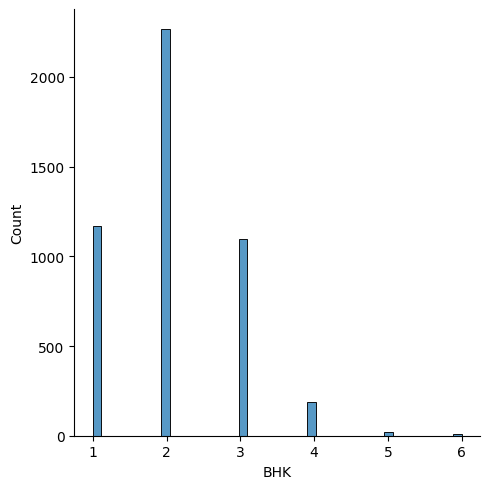

In [8]:
sns.displot(rent_df['BHK'])

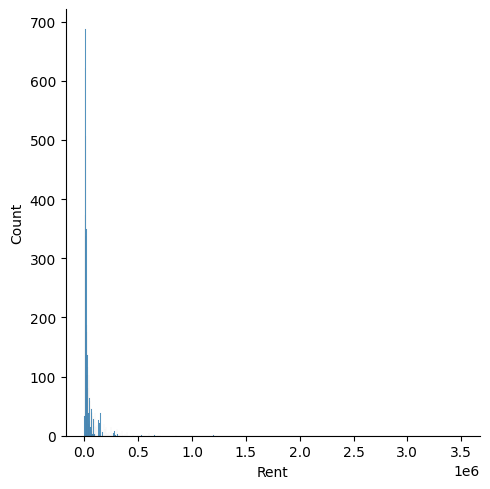

In [9]:
sns.displot(rent_df['Rent'])

In [10]:
rent_df['Rent'].sort_values()

,Rent
4076,1200
285,1500
471,1800
2475,2000
146,2200
...,...
1459,700000
1329,850000
827,1000000
1001,1200000


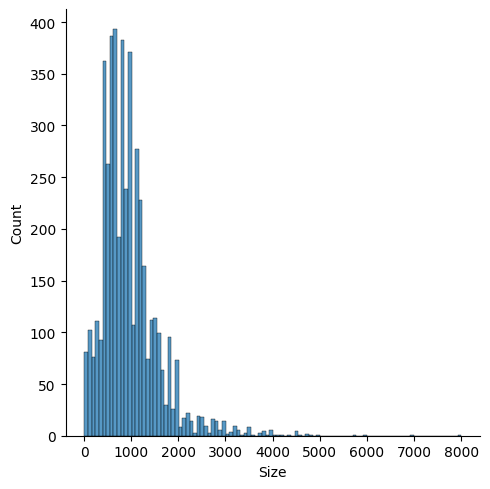

In [11]:
sns.displot(rent_df['Size'])

### boxplot
Boxplot은 데이터의 중앙값, 사분위수, 이상치 등을 시각적으로 표현하는 통계 그래프입니다. 주로 데이터 분포와 이상치를 빠르게 파악하기 위해 사용됩니다.
1. 중앙값 (Median, Q2): 데이터를 크기 순으로 정렬했을 때 중간에 위치한 값
2. Q1 (제1사분위수, 25%): 하위 25%에 해당하는 값
3. Q3 (제3사분위수, 75%): 상위 25%에 해당하는 값
4. IQR (Interquartile Range, 사분위 범위): Q3 - Q1, IQR은 데이터의 중간 50% 범위를 의미합니다.
5. Minimum: Q1 − 1.5 × IQR 이하에 속하지 않는 가장 작은 값
6. Maximum: Q3 + 1.5 × IQR 이하에 속하지 않는 가장 큰 값
7. 이상치: 일반적인 데이터 분포를 벗어난 값(Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR)
> IQR 기준으로 이상치를 정의하기 때문에 모든 상황에 완벽하지 않을 수 있습니다

<Axes: ylabel='Rent'>

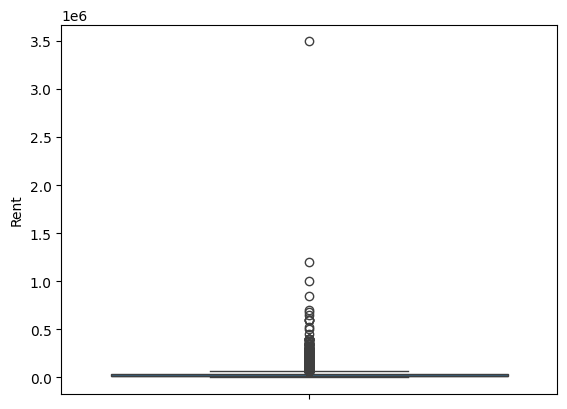

In [12]:
sns.boxplot(rent_df['Rent'])

<Axes: ylabel='Size'>

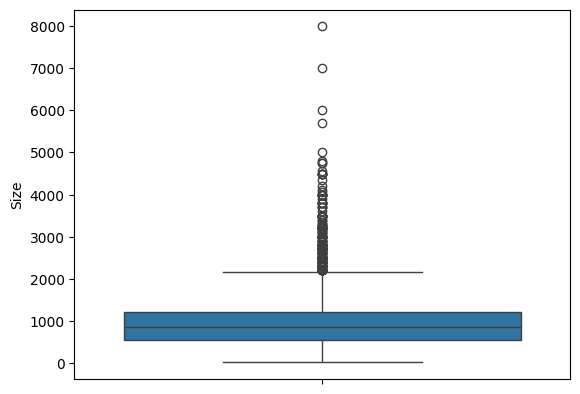

In [13]:
sns.boxplot(rent_df['Size'])

<Axes: ylabel='BHK'>

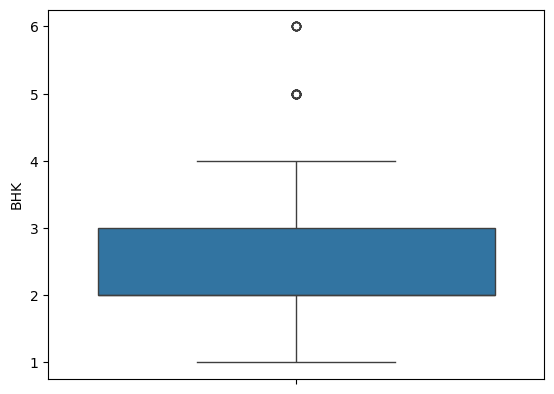

In [14]:
sns.boxplot(rent_df['BHK'])

In [15]:
rent_df.isna().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [16]:
rent_df.isna().mean()

,0
Posted On,0.0
BHK,0.0
Rent,0.0
Size,0.0
Floor,0.0
Area Type,0.0
Area Locality,0.0
City,0.0
Furnishing Status,0.0
Tenant Preferred,0.0


In [17]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [18]:
rent_df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [19]:
rent_df['Area Type'].nunique()

3

In [20]:
for i in ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    print(i, rent_df[i].nunique())

Posted On 81
Floor 480
Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [21]:
rent_df.drop(['Floor', 'Area Locality', 'Posted On'], axis=1, inplace=True)

In [22]:
rent_df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [23]:
rent_df = pd.get_dummies(rent_df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [24]:
X = rent_df.drop('Rent', axis=1)
y = rent_df['Rent']

In [25]:
X.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,800,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,1000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,800,1,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,850,1,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [26]:
y

,Rent
0,10000
1,20000
2,17000
3,10000
4,7500
...,...
4741,15000
4742,29000
4743,35000
4744,45000


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

In [29]:
X_train.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
1583,1,800,1,False,True,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4704,1,150,1,False,True,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
1206,1,495,2,False,False,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
1097,1,330,1,False,True,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,True
3494,1,700,1,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True


In [30]:
X_train.shape, X_test.shape

((3322, 21), (1424, 21))

In [31]:
y_train.shape, y_test.shape

((3322,), (1424,))

# **4. 알고리즘으로 모델링**

### 사이킷런의 선형 회귀 학습 방법
사이킷런의 LinearRegression은 최소 제곱법(Ordinary Least Squares, OLS)을 기반으로 학습하며, 입력 데이터와 실제 목표값 사이의 잔차(Residual)의 제곱합을 최소화하는 방식으로 최적의 가중치(Weight)와 절편(Bias)를 구합니다. 내부적으로는 수치적으로 더 안정적인 특이값 분해(Singular Value Decomposition, SVD)를 사용하여 계산됩니다. 이 방식은 데이터셋이 비교적 작고 특성 수가 적당할 때 효율적입니다.

### 최소제곱법
최소 제곱법(Least Squares Method)은 주어진 데이터 포인트들과 예측 모델(주로 직선) 사이의 오차(Residuals)의 제곱합(Sum of Squared Errors, SSE)을 최소화하여 최적의 예측 모델을 찾아내는 통계적 방법입니다. 이 방법은 선형 회귀 분석에서 가장 널리 사용되며, 데이터 포인트들이 회귀선(Regression Line)에 최대한 가깝도록 조정합니다. 수학적으로는 오차의 제곱합을 최소화하는 기울기(w)와 절편(b)을 계산하여 모델을 최적화합니다.

### 닫힌 해(Closed-form Solution)

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F1n6q2%2FbtsLFYa8e7H%2FCgvViG9a8iJuAPznPHK3W1%2Fimg.png'>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdNyyBt%2FbtsLHnAZlwc%2FccxcnE7xadaQoWXQGzkeek%2Fimg.png'>


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([168427.98865322,  37550.57051365,  46227.94809703, ...,
         5359.0119441 ,  55103.27974897, -13749.95956338])

In [34]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [35]:
print(mean_squared_error(y_test, pred))
print(root_mean_squared_error(y_test, pred))

1845945611.7086728
42964.46917755034
